Data Pre-processing

In [ ]:
#loading and accessing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data=pd.read_csv("laptop_price.csv", encoding="latin-1")

In [ ]:
#renaming columns to make it easier to access them
data = data.rename(columns=str.lower)
data.rename(columns = {'price_euros':'price'}, inplace = True)
data.rename(columns = {'laptop_id':'id'}, inplace = True)
data.rename(columns = {'typename':'type'}, inplace = True)
data.rename(columns = {'opsys':'os'}, inplace = True)
#dropping the 'product' and "id" column pertaining to of their insignificance in the analysis
data.drop(columns = 'id', inplace = True)
data.drop(columns = 'product', inplace = True)
data.head()


,company,type,inches,screenresolution,cpu,ram,memory,gpu,os,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   type              1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   object 
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   os                1303 non-null   object 
 9   weight            1303 non-null   object 
 10  price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
len(data.columns)

11

In [ ]:
data.columns

Index(['company', 'type', 'inches', 'screenresolution', 'cpu', 'ram', 'memory',
       'gpu', 'os', 'weight', 'price'],
      dtype='object')

In [ ]:
data.describe()

,inches,price
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [ ]:
data.isnull().sum()

company             0
type                0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
os                  0
weight              0
price               0
dtype: int64

In [ ]:
data.shape

(1303, 11)

In [ ]:
data['os'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: os, dtype: int64

In [ ]:
print(data.corr())

          inches     price
inches  1.000000  0.068197
price   0.068197  1.000000


In [ ]:
print(data.duplicated())
#there's no duplicates



0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 1303, dtype: bool


In [ ]:
print(data.isnull().sum())
#there's no  null value

company             0
type                0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
os                  0
weight              0
price               0
dtype: int64


Number of company :  19
Laptop's company :  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


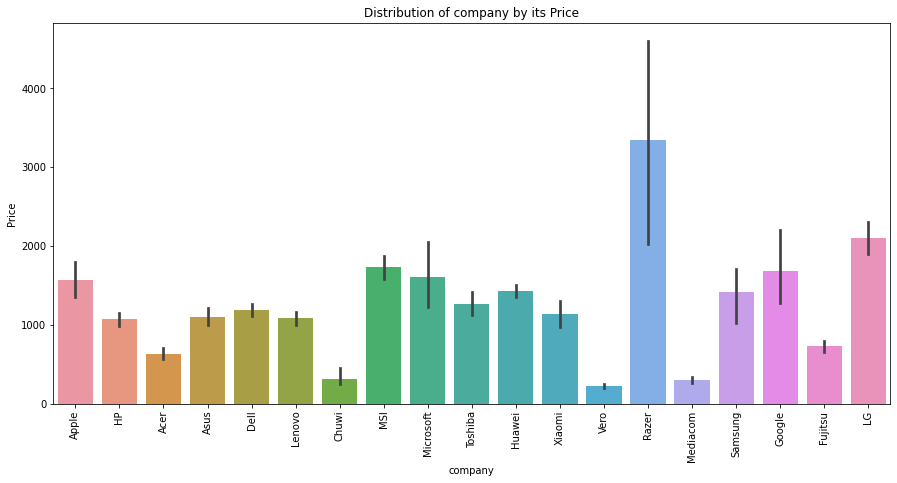

Number of type :  6
Laptop's type :  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


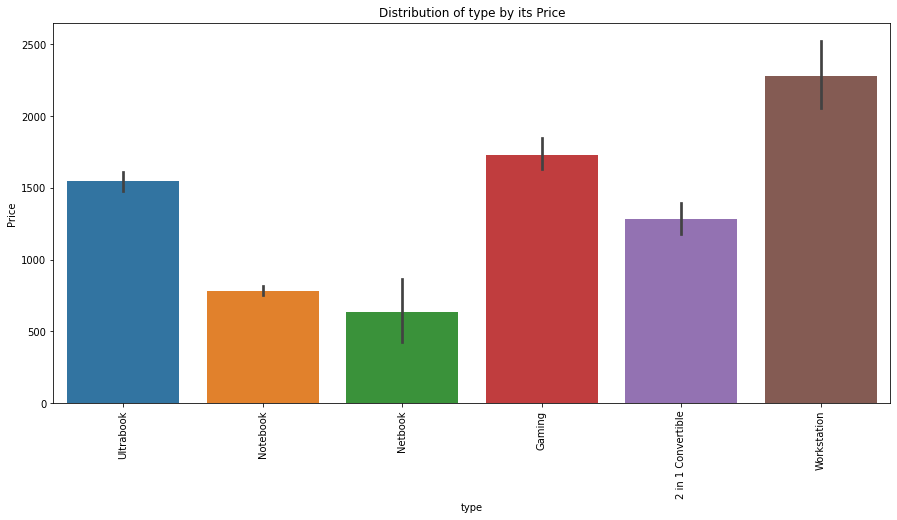

Number of memory :  39
Laptop's memory :  ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


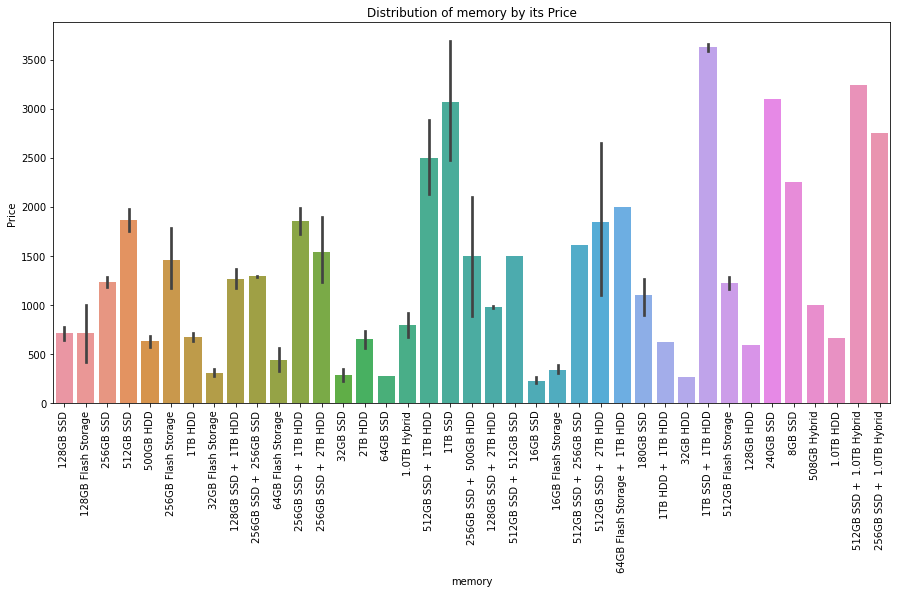

Number of ram :  9
Laptop's ram :  ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


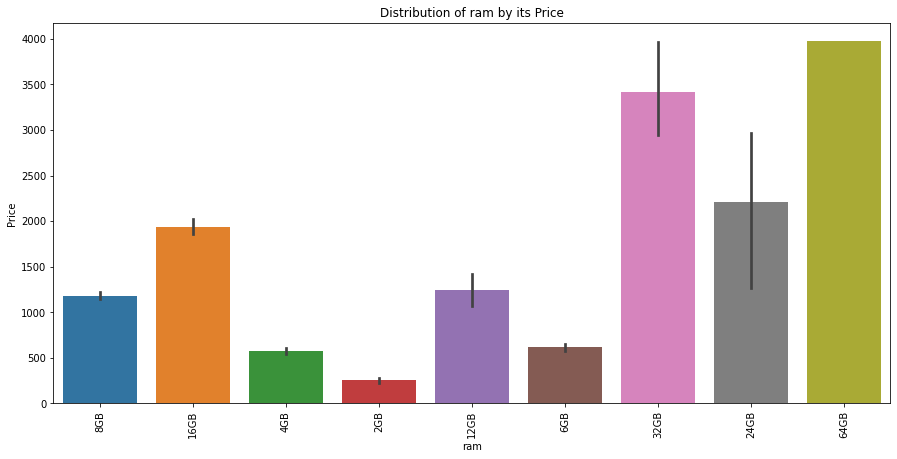

Number of screenresolution :  40
Laptop's screenresolution :  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchsc

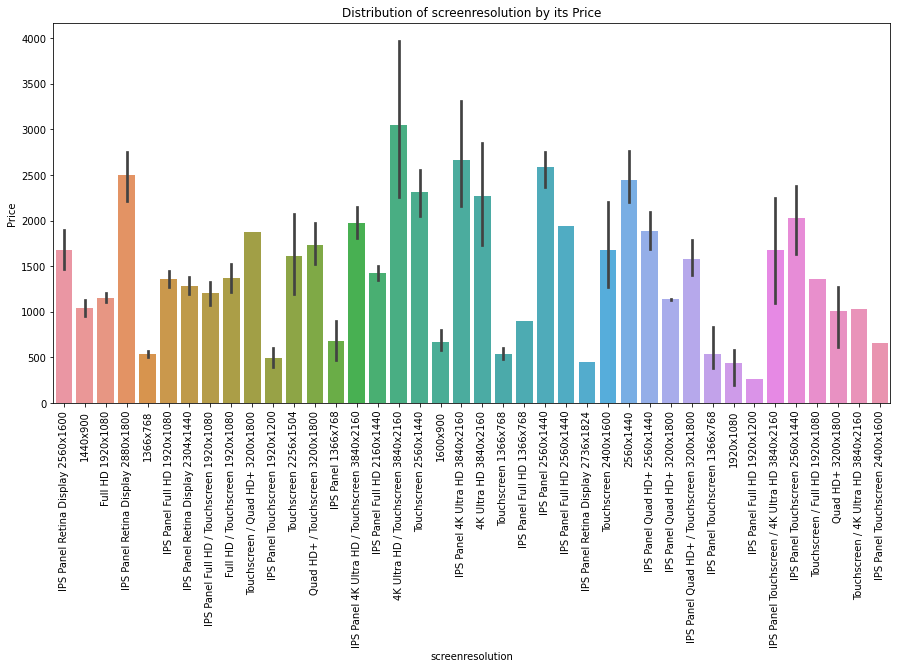

Number of os :  9
Laptop's os :  ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


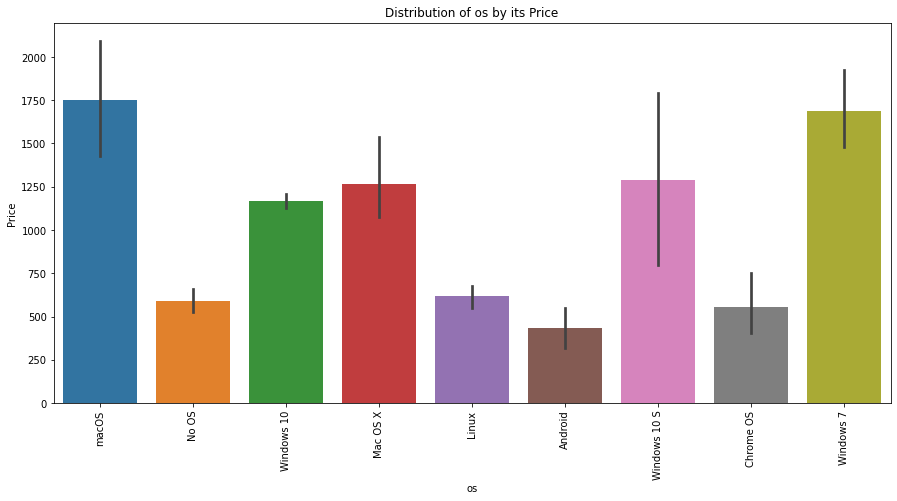

Number of cpu :  118
Laptop's cpu :  ['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700 3GHz' 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Atom x5-Z8550 1.44GHz' 'Intel Celeron Dual Core N3060 1.6GHz'
 'Intel Core i5 1.3GHz' 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-S

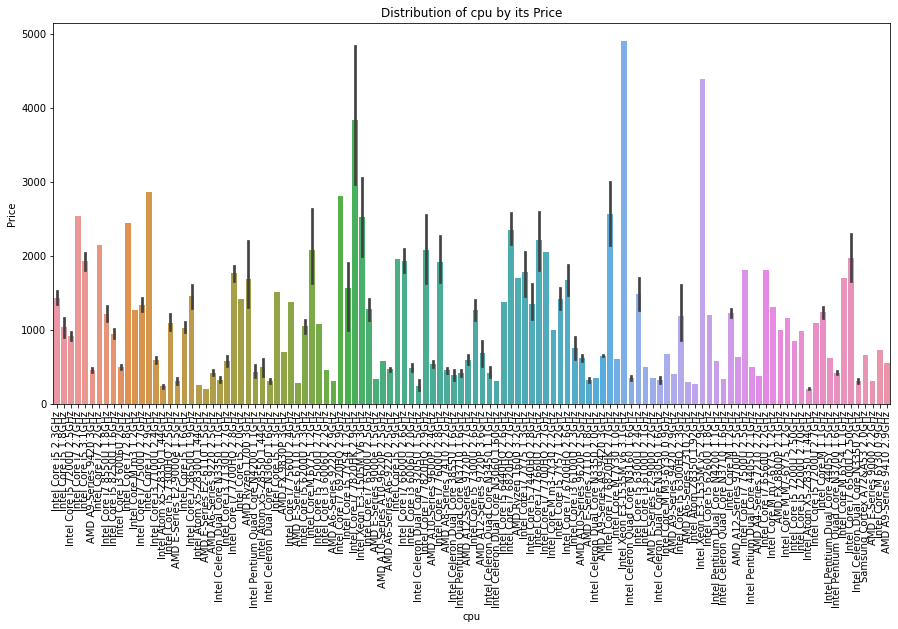

In [ ]:
#plotting a bar plot between all attributes of the laptop and their corresponding prices
cols = ['company', 'type', 'memory', 'ram', 'screenresolution', 'os', 'cpu']
def price_plot(data, var):
    data = data.copy()
    print('Number of', var,': ',data[var].nunique())
    print('Laptop\'s', var,': ', data[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} by its Price')
    sb.barplot( x = var,y = 'price',data = data, )
    plt.xticks(rotation = 90)
    plt.ylabel('Price')
    plt.show()
for var in cols:
    price_plot(data, var)

In [ ]:
data["ram"] = data["ram"].str.replace('GB', '')
data["ram"] = data["ram"].str.replace('TB', '')
data["weight"] = data["weight"].str.replace('kg', '')
data["os"]=data["os"].str.replace('macOS x','macOS')
data["os"]=data["os"].str.replace('Windows 10 S','Windows 10')
data.head()

,company,type,inches,screenresolution,cpu,ram,memory,gpu,os,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


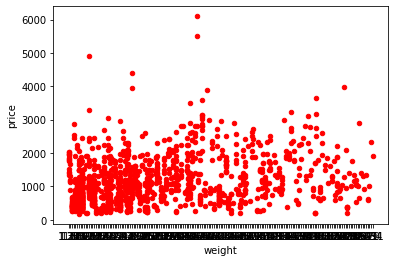

In [ ]:
data.plot(kind = 'scatter', x = 'weight', y = 'price', color='red')
plt.show()

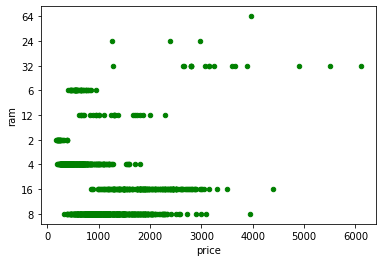

In [ ]:
data.plot(kind = 'scatter', x = 'price', y = 'ram',color='green')

plt.show()

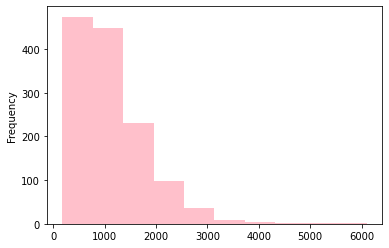

In [ ]:
data['price'].plot(kind ='hist', color='pink') 
plt.show()